# Tests

## Basic tests

### Utilisation of classes

In [1]:
from class_Path import *
file_path = "./ged docs/Queen_Eliz_II.ged"

In [2]:
graph = Graph(file_path)
path = Path(file_path)

In [3]:
#graph.get_IndivLinks_DataFrame()

In [4]:
#path.print_table('@I11259@','@I10835@')

In [5]:
path.get_dij('@I11259@','@I10835@')

[['@I11257@', 'child'], ['@I11250@', 'grandchild'], ['@I11175@', 'grandchild'], ['@I11179@', 'grandchild'], ['@I11183@', 'grandchild'], ['@I8765@', 'spouse'], ['@I8761@', 'grandparent'], ['@I8756@', 'grandparent'], ['@I8752@', 'grandparent'], ['@I8745@', 'grandparent'], ['@I8748@', 'grandparent'], ['@I2216@', 'grandparent'], ['@I10835@', 'nephew']]


[36,
 'Isabella (le) is the daughter of the nephew of Thomas, who is the grand son of the nephew of the nephew of Dorothy, who is the wife of the niece of the niece of Henry (4th Lord of Groby) de, who is the grand father of the nephew of the niece of Eva, who is the grand mother of the niece of Thomas.']

## Parameters tests

In [1]:
from class_Test import *

### Queen_Eliz_II.ged

In [2]:
# /!\ Very long : takes up to 15 minutes /!\
test = Test("./ged docs/Queen_Eliz_II.ged")

In [3]:
test.comparison_Dataframe()

,Path,Distance,Dijkstar distance,Execution time (s),Dijkstar execution time (s),Difference of execution time (s)
Individuals,,,,,,
"[@I4351@, @I10381@]",Arthur (Sir; of Paulerspury) is the grand son ...,38,38,31.248667,31.903453,-0.654786
"[@I7882@, @I4486@]",Beli (Belus) of BRITAIN is the son of the gran...,82,82,57.088756,57.444159,-0.355403


In [4]:
test.average()

(44.1687114238739, 44.673805832862854)

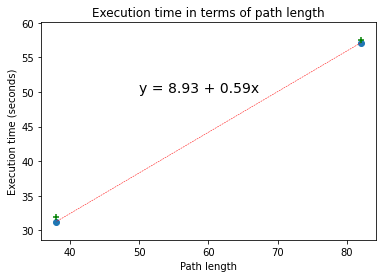

In [5]:
test.plot_Distance_Time()

In 0.0% of cases, the Dijkstra algorithm is faster.


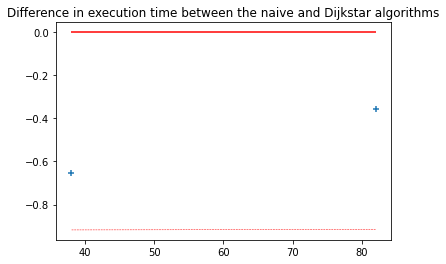

In [6]:
test.plot_difference()

### SeigneursGed.ged

In [7]:
# /!\ Very long : takes up to 15 minutes /!\
test2 = Test("./ged docs/SeigneursGed.ged")

/Users/theophiledechelotte/Documents/1A Mines/UE 22 - Ingéniérie Logicielle/Projet arbre généalogique/projet_informatique_famille/class_Graph.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2.at[f'{indiv1}',f'CHILD{N_childrens}'] = f'{indiv3}'
/Users/theophiledechelotte/Documents/1A Mines/UE 22 - Ingéniérie Logicielle/Projet arbre généalogique/projet_informatique_famille/class_Graph.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2.at[f'{indiv1}',f'CHILD{N_childrens}'] = f'{indiv3}'
/Users/theophiledechel

In [8]:
test2.comparison_Dataframe()

,Path,Distance,Dijkstar distance,Execution time (s),Dijkstar execution time (s),Difference of execution time (s)
Individuals,,,,,,
"[@72972I@, @15676I@]",Louis Marie Philibert is the sister of the wi...,5,5,0.299517,0.321520,-0.022003
"[@42081I@, @21798I@]",Jean-Louis Félicité is the father of the grand...,5,5,0.208376,0.179086,0.029290


#### Validation 

In [11]:
from gedcom.element.individual import IndividualElement
from gedcom.parser import Parser
from class_Path import *

gedcom_parser = Parser()

file_path = './ged docs/Queen_Eliz_II.ged'
gedcom_parser = Parser()
gedcom_parser.parse_file(file_path)
root_child_elements = gedcom_parser.get_root_child_elements()

def find_IndividualElement(first_name,last_name):
    """
    Get Individual element of ged with first names and last name

    Parameters
    ---
    first_names : str
        complete first names of the individual
    last_name : str
        last names of the individual 

    Returns 
    ---
    bool 
        Tells if the individual was found
    IndividualElement
        IndividualElement corresponding to the individual in the ged

    """
    for element in root_child_elements:
        if isinstance(element, IndividualElement):
            if element.surname_match(last_name) and element.given_name_match(first_name):
                return (True, element)
    return [False, element]

ind1 = find_IndividualElement("Elizabeth II Alexandra Mary","Windsor")
ind2 = find_IndividualElement("George V", "Windsor")

path = Path(file_path)

path.get_dij(ind1,ind2)

ValueError: could not convert string to float: '@I103@'